In [40]:
import h5py
import numpy as np
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [41]:
#df=pd.read_csv('/Users/spencershortt/TNG2019/machine_learning_tng100.txt', sep="\t")
df=pd.read_csv('/Users/spencershortt/TNG2019/machine_learning_tng100_2.txt', sep="\t")
df.head()

Unnamed: 0   id      gini       m20  concentration  flag  label  \
0           0  0.0  0.614704 -2.752232       4.527077   0.0      1   
1           1  1.0  0.574363 -2.220317       3.663501   0.0      1   
2           2  2.0  0.647357 -2.288265       4.597688   0.0      1   
3           3  3.0  0.513784 -2.029409       3.567780   0.0      2   
4           4  5.0  0.573778 -2.596948       4.938205   0.0      1   

   mass_stars        sfr    GasMass    ...     gas_metallicity_in_halfrad  \
0    251.0160   2.227190  3900.6000    ...                       0.007995   
1     37.8526   0.413285   444.5590    ...                       0.011339   
2     42.4824  17.392200    12.6116    ...                       0.012482   
3     11.6209   5.079380    16.9682    ...                       0.026441   
4     13.0163   0.886559     2.0604    ...                       0.016969   

    u_band   b_band   v_band   k_band   g_band   r_band   i_band   z_band  \
0 -24.1033 -24.5115 -25.3760 -28.3094 -24.9662 -25.7158 -26.0726 -26.3286   
1 -22.1142 -22.4991 -23.3480 -26.2491 -22.9476 -23.6833 -24.0339 -24.2839   
2 -23.0677 -23.1291 -23.7847 -26.5456 -23.4980 -24.0692 -24.3691 -24.5975   
3 -21.9708 -22.0503 -22.6820 -25.3858 -22.4122 -22.9552 -23.2390 -23.4537   
4 -21.0785 -21.4155 -22.2306 -25.1326 -21.8497 -22.5584 -22.9041 -23.1542   

       sSFR  
0  0.008873  
1  0.010918  
2  0.409398  
3  0.437090  
4  0.068111  

[5 rows x 26 columns]

In [42]:
df.columns

Index(['Unnamed: 0', 'id', 'gini', 'm20', 'concentration', 'flag', 'label',
       'mass_stars', 'sfr', 'GasMass', 'gas_metallicity', 'star_metallicity',
       'sfr_in_halfrad', 'mass_in_halfrad_stars', 'mass_in_halfrad_gas',
       'star_metallicity_in_halfrad', 'gas_metallicity_in_halfrad', 'u_band',
       'b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band',
       'sSFR'],
      dtype='object')

In [43]:
#X=df[['k_band','sfr','mass_stars','gas_metallicity','star_metallicity']]
#X=df[['k_band','mass_stars','sSFR']]#,'mass_stars','gas_metallicity','star_metallicity']]
#X=df.drop(["id",'flag','label','gini','m20','concentration'],axis=1)
X=df[['u_band','b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band',
     'sfr','mass_stars','gas_metallicity','star_metallicity','sSFR']]
#X=df[['sfr_in_halfrad', 'mass_in_halfrad_stars', 'mass_in_halfrad_gas',
#       'star_metallicity_in_halfrad', 'gas_metallicity_in_halfrad']]
#X=df[['gini', 'm20', 'concentration']]

y=df['label']
y.head()

0    1
1    1
2    1
3    2
4    1
Name: label, dtype: int64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=4)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6601, 13)
(6601,)
(1651, 13)
(1651,)


In [46]:
k_range=range(1,26)
train_scores={}
train_scores_list=[]
test_scores={}
test_scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #test_scores[k]=metrics.accuracy_score(y_test, y_pred)
    #test_scores_list.append(metrics.accuracy_score(y_test, y_pred))
    test_scores[k]=knn.score(X_test, y_test)
    test_scores_list.append(knn.score(X_test, y_test))
    train_scores[k]=knn.score(X_train, y_train)
    train_scores_list.append(knn.score(X_train, y_train))


0.680193821926


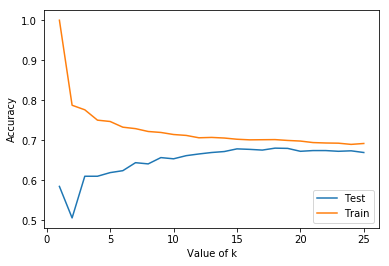

In [47]:
plt.plot(k_range, test_scores_list, label='Test')
plt.plot(k_range, train_scores_list, label='Train')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
print(max(test_scores_list))

In [48]:
forest = RandomForestClassifier(n_estimators=18, random_state=20)#n_estimators=5 original
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=18, n_jobs=1, oob_score=False, random_state=20,
            verbose=0, warm_start=False)

In [49]:
forest.score(X_train, y_train)


0.99636418724435694

In [50]:
forest.score(X_test, y_test)

0.68261659600242275

In [51]:
forest.feature_importances_

array([ 0.07796825,  0.05722666,  0.05216564,  0.09132653,  0.05913392,
        0.05711727,  0.05918878,  0.07066541,  0.07177678,  0.12055796,
        0.0841648 ,  0.10080455,  0.09790345])

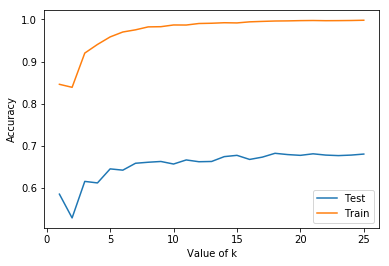

In [53]:
test_scores_list=[]
train_scores_list=[]
for n in k_range:
    forest = RandomForestClassifier(n_estimators=n, random_state=20)#n_estimators=5 original
    forest.fit(X_train, y_train)
    
    train_scores_list.append(forest.score(X_train, y_train))
    test_scores_list.append(forest.score(X_test, y_test))
    

plt.plot(k_range, test_scores_list, label='Test')
plt.plot(k_range, train_scores_list, label='Train')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")